# Perceptron from Scratch using Python

In [12]:
# Source code: https://github.com/yacineMahdid/artificial-intelligence-and-machine-learning/blob/master/deep-learning-from-scratch-python/perceptron.ipynb
import random

class Perceptron():
    '''
        Perceptron Learning Algorithm that can be train using a 
        fit and predict methodology, without any library
    '''
    
    def __init__(self):
        self.weights = []
        
    def fit(self, X, y, learning_rate = 0.01, num_iteration = 100):
        
        num_row = len(X)
        num_feature = len(X[0]) # Here we assume that we have a rectangular matrix
        
        # Randomly initalize the weights
        for i in range(num_feature+1):
            self.weights.append(random.uniform(0,1))
        
        # Launch the training algorithm
        
        for i in range(num_iteration):
            
            # Stochastic Gradient Descent
            r_i = random.randint(0,num_row-1)
            row = X[r_i]
            yhat = self.predict(row)
            error = (y[r_i] - yhat)
            self.weights[0] = self.weights[0] + learning_rate*error

            for f_i in range(num_feature):
                self.weights[f_i] = self.weights[f_i] + learning_rate*error*row[f_i]

            if i % 100 == 0:
                total_error = 0
                for r_i in range(num_row):
                    row = X[r_i]
                    yhat = self.predict(row)
                    error = (y[r_i] - yhat)
                    total_error = total_error + error**2
                mean_error = total_error/num_row
                print(f"Iteration {i} with error = {mean_error}")

    def predict(self, row):
            
        # The activation start with the bias at weights == 0
        activation = self.weights[0]
        
        # We iterate over the weights and the features in the given row
        for weight, feature in zip(self.weights[1:], row):
            activation = activation + weight*feature
            
        if activation >= 0.0:
            return 1.0
        return 0.0

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

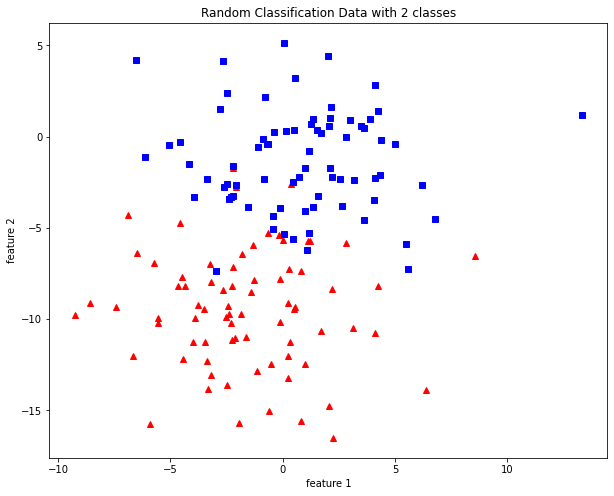

In [13]:
from sklearn import datasets
import matplotlib.pyplot as plt
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=3,
                           random_state=2)#Plotting

fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

## Training

In [14]:
model = Perceptron()
model.fit(X,y, num_iteration = 1000)

Iteration 0 with error = 0.26666666666666666
Iteration 100 with error = 0.2733333333333333
Iteration 200 with error = 0.3
Iteration 300 with error = 0.34
Iteration 400 with error = 0.24
Iteration 500 with error = 0.12
Iteration 600 with error = 0.12
Iteration 700 with error = 0.08
Iteration 800 with error = 0.08666666666666667
Iteration 900 with error = 0.14666666666666667


## Prediction

In [15]:
import numpy as np
y_pred = []
for row in X:
    y_pred.append(model.predict(row))
y_pred = np.array(y_pred)

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

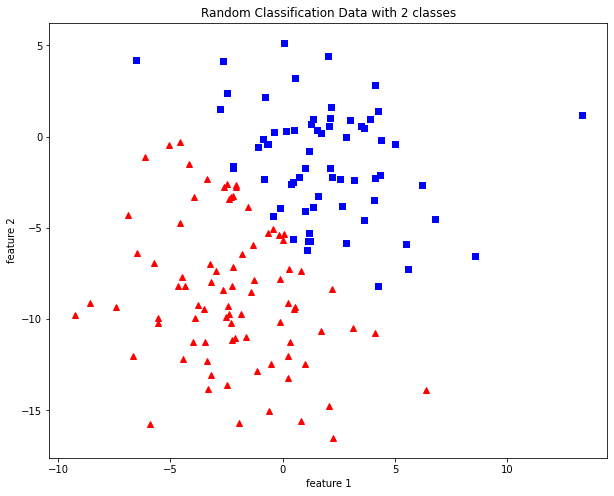

In [16]:
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y_pred == 0], X[:, 1][y_pred == 0], 'r^')
plt.plot(X[:, 0][y_pred == 1], X[:, 1][y_pred == 1], 'bs')
plt.plot(X[:, 0][y_pred == 1], X[:, 1][y_pred == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

In [17]:
def plot_decision_boundary(X, y, theta):
    # Source: https://towardsdatascience.com/perceptron-algorithm-in-python-f3ac89d2e537
    
    # X --> Inputs
    # theta --> parameters
    
    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = np.array([min(X[:,0]), max(X[:,0])])
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Perceptron Algorithm')    
    plt.plot(x1, x2, 'y-')

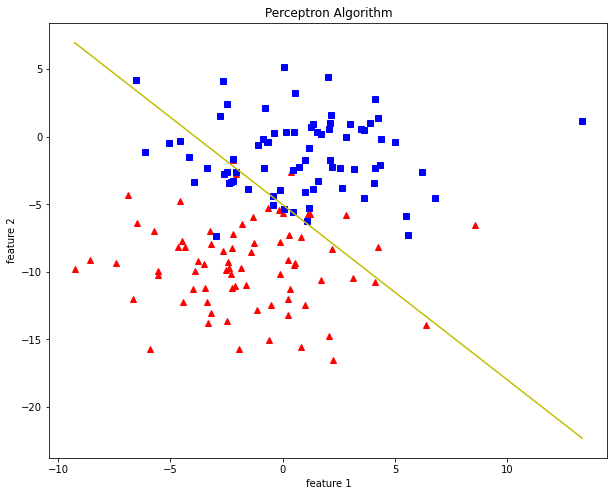

In [18]:
plot_decision_boundary(X, y, model.weights)

# Perceptron from Scratch using Python with Numpy

In [19]:
import numpy as np
import random


# Perceptron with numpy + pandas
# The guy is great, will definetly give a shoutout
class Perceptron2():
    '''
        Perceptron Learning Algorithm that can be train using a 
        fit and predict methodology with numpy
    '''
    
    def __init__(self):
        self.weights = []
        
    def fit(self, X, y, learning_rate = 0.01, num_iteration = 100):
        
        (num_row, num_feature) = X.shape
        
        # Randomly initalize the weights
        self.weights = np.random.rand(num_feature+1) 

        # Launch the training algorithm
        for i in range(num_iteration):
            
            # Stochastic Gradient Descent
            r_i = random.randint(0,num_row-1)
            row = X[r_i,:] # take the random sample from the dataset
            yhat = self.predict(row)
            error = (y[r_i] - yhat) # estimate of the gradient
            self.weights[0] = self.weights[0] + learning_rate*error*1 # first weight one is the bias

            # Update all parameters after bias
            for f_i in range(num_feature):
                self.weights[f_i] = self.weights[f_i] + learning_rate*error*row[f_i]
 
            if i % 100 == 0:
                total_error = 0
                for r_i in range(num_row):
                    row = X[r_i,:]
                    yhat = self.predict(row)
                    error = (y[r_i] - yhat)
                    total_error = total_error + error**2
                mean_error = total_error/num_row
                print(f"Iteration {i} with error = {mean_error}")

    def predict(self, row):
            
        # The activation start with the bias at weights == 0
        activation = self.weights[0]
        
        # We iterate over the weights and the features in the given row
        for weight, feature in zip(self.weights[1:], row):
            activation = activation + weight*feature
            
        # Heaviside Step Function Activation
        if activation >= 0.0:
            return 1.0
        return 0.0

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

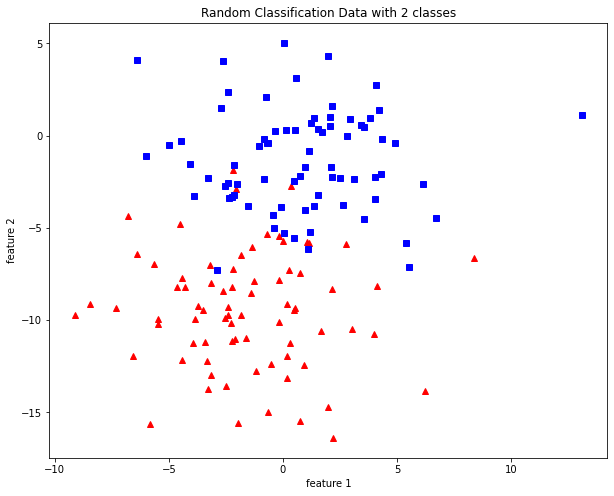

In [20]:
from sklearn import datasets
import matplotlib.pyplot as plt
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=2.95,
                           random_state=2)#Plotting

fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

In [21]:
model = Perceptron2()
model.fit(X,y, num_iteration=1000)

Iteration 0 with error = 0.31333333333333335
Iteration 100 with error = 0.3333333333333333
Iteration 200 with error = 0.32
Iteration 300 with error = 0.16666666666666666
Iteration 400 with error = 0.09333333333333334
Iteration 500 with error = 0.08
Iteration 600 with error = 0.07333333333333333
Iteration 700 with error = 0.14666666666666667
Iteration 800 with error = 0.16
Iteration 900 with error = 0.11333333333333333


In [22]:
y_pred = []
for row in X:
    y_pred.append(model.predict(row))
y_pred = np.array(y_pred)

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

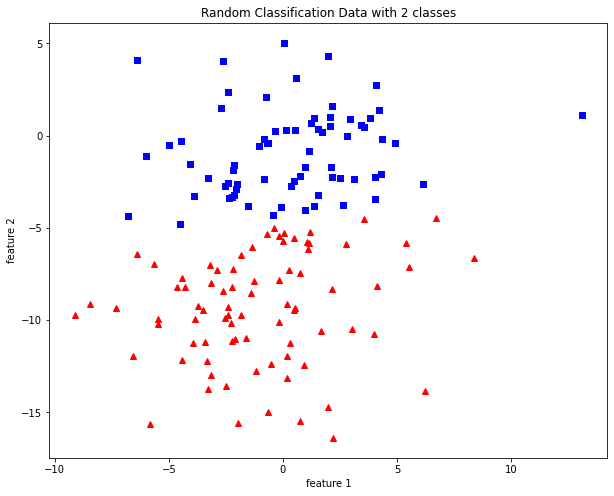

In [23]:
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y_pred == 0], X[:, 1][y_pred == 0], 'r^')
plt.plot(X[:, 0][y_pred == 1], X[:, 1][y_pred == 1], 'bs')
plt.plot(X[:, 0][y_pred == 1], X[:, 1][y_pred == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

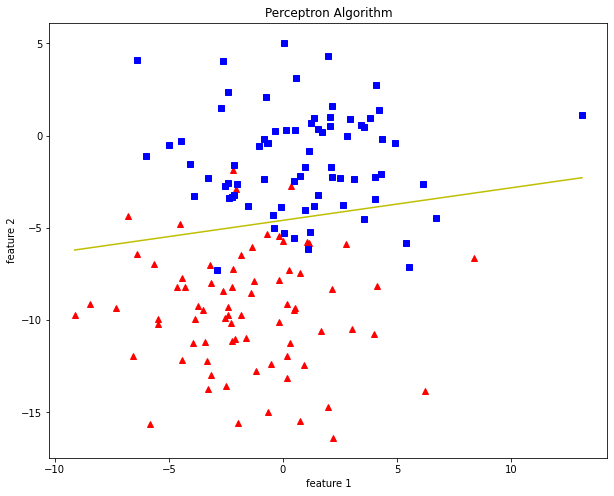

In [24]:
plot_decision_boundary(X, y, model.weights)